# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/real_estate_data.csv')
    print('Hello')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t', engine='python')
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

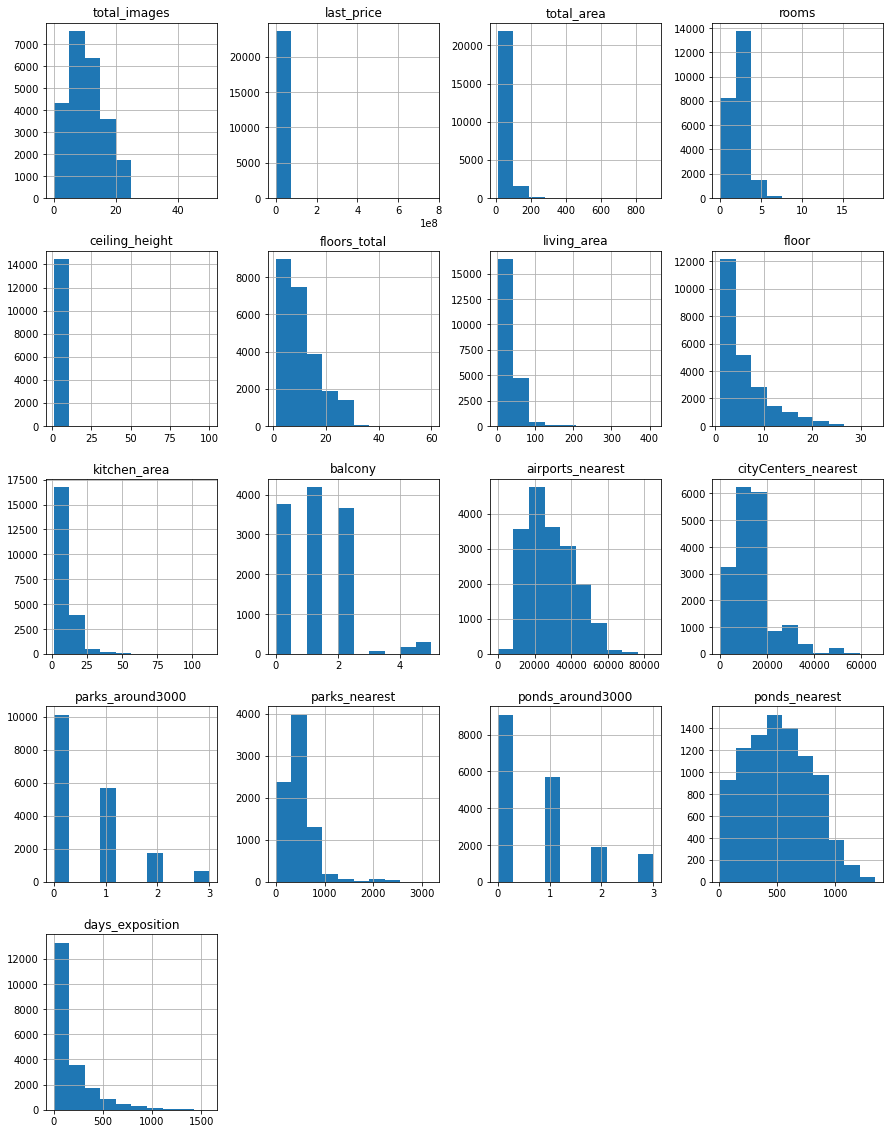

In [3]:
data.hist(figsize=(15, 20))

# Шаг 2. Предобработка данных

### Пропуски

#### Заменим пропуски в столбце balcony на 0, потому что если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Проверим результат.

In [4]:
data['balcony'] = data['balcony'].fillna(0)

#### Заменим пропуски в высоте потолка, площади кухни и количестве этажей медианным значением (в данных явно есть выбросы, среднее значение брать нельзя).

In [5]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) 
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median()) 

#### Заполним пропуски в площади квартиры, взяв медианное значение квартир с тем же количеством комнат.

In [6]:
for value in data['rooms'].unique():
    data[(data['living_area'].isna()) & (data['rooms'] == value)] = data[(data['living_area'].isna()) & (data['rooms'] == value)].fillna(value)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,3.00,9,3,...,9.10,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,NaN,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,2.00,22,2,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,2.0,0.0,2.0,2.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,NaN,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Обнаружены неустранимые пропуски: airport_nearest, cityCenters_nearest, days_exposition, is_apartment, locality_name, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest. 
#### Причинами пропусков могут быть ошибки при хранении и передачи данных, нежелание продавцов заполнять некоторые данные 

In [7]:
data['days_exposition'] = data['days_exposition'].fillna(-1)
data['is_apartment'] = data['is_apartment'].fillna(True)
data['locality_name'] = data['locality_name'].fillna('')
data['airports_nearest'] = data['airports_nearest'].fillna(-1)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(-1)
data['parks_around3000'] = data['parks_around3000'].fillna(-1)
data['ponds_nearest'] = data['ponds_nearest'].fillna(-1)
data['parks_nearest'] = data['parks_nearest'].fillna(-1)
data['ponds_around3000'] = data['ponds_around3000'].fillna(-1)

### Типизация данных

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

#### Преобразуем float в int, где необходимо.

In [9]:
data['balcony'] = data['balcony'].astype('int', errors='ignore')
data['days_exposition'] = data['days_exposition'].astype('int',  errors='ignore')
data['floors_total'] = data['floors_total'].astype('int', errors='ignore')
data['parks_around3000'] = data['parks_around3000'].astype('int', errors='ignore')
data['ponds_around3000'] = data['ponds_around3000'].astype('int', errors='ignore')
data['ponds_nearest'] = data['ponds_nearest'].astype('int', errors='ignore')
data['parks_nearest'] = data['parks_nearest'].astype('int', errors='ignore')
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int', errors='ignore')

#### Теперь преобразуем строку в дату и логический тип в столбцах с датой публикации и апартаментами. 

In [10]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['is_apartment'] = data['is_apartment'].astype('bool', errors='ignore')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,25.0,0,Санкт-Петербург,18863.0,16028,1,482,2,755,-1
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,11.0,2,посёлок Шушары,12817.0,18603,0,-1,0,-1,81
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,8.3,0,Санкт-Петербург,21741.0,13933,1,90,2,574,558
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,3.0,9,True,...,9.1,0,Санкт-Петербург,28098.0,6800,2,84,3,234,424
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,41.0,0,Санкт-Петербург,31856.0,8098,2,112,1,48,121


### Удалим неявные дубликаты в названиях населённых пунктов

In [11]:
print(len(data['locality_name'].unique()))
data['locality_name'] = data['locality_name'].str.replace('ё','е')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','поселок')
len(data['locality_name'].unique())

368


331

### Устраним редкие и выбивающиеся значения 

#### Изучим максимальные и минимальные значения в каждом столбце.

In [12]:
for column in data.columns:
    try:
        print(column, max(data[column]), min(data[column][data[column] >= 0]))
    except TypeError:
        print('No max/min for', column)

total_images 50 0
last_price 763000000.0 12190.0
total_area 900.0 12.0
No max/min for first_day_exposition
rooms 19 0
ceiling_height 100.0 1.0
floors_total 60 1
living_area 409.7 0.0
floor 33 1
is_apartment True False
studio True False
open_plan True False
kitchen_area 112.0 1.3
balcony 5 0
No max/min for locality_name
airports_nearest 84869.0 0.0
cityCenters_nearest 65968 0
parks_around3000 7 0
parks_nearest 3190 0
ponds_around3000 7 0
ponds_nearest 1344 0
days_exposition 1580 0


#### Полученные данные свидетельствуют об ошибках в ceiling_height,  parks_around3000, ponds_around3000, days_exposition, rooms. Уберем неправдоподобные значения.

In [13]:
data = data.drop(data.query('ceiling_height >= 7 or ceiling_height <= 1.5').index).reset_index(drop=True)
data = data.drop(data.query('parks_around3000 > 3').index).reset_index(drop=True)

data = data.drop(data.query('living_area < 5').index).reset_index(drop=True)
data = data.drop(data.query('ponds_around3000 > 3').index).reset_index(drop=True)

data = data.drop(data.query('days_exposition >= 500').index).reset_index(drop=True)
data = data.drop(data.query('kitchen_area < 5').index).reset_index(drop=True)

data = data.drop(data.query('rooms == 0').index).reset_index(drop=True)

for column in data.columns:
    try:
        print(column, max(data[column]), min(data[column][data[column] >= 0]))
    except BaseException:
        print('No max/min for', column)


total_images 50 0
last_price 763000000.0 12190.0
total_area 900.0 12.0
No max/min for first_day_exposition
rooms 19 1
ceiling_height 6.0 1.75
floors_total 60 1
living_area 409.7 5.0
floor 33 1
is_apartment True False
studio True False
open_plan True False
kitchen_area 112.0 5.0
balcony 5 0
No max/min for locality_name
airports_nearest 84853.0 0.0
cityCenters_nearest 65952 181
parks_around3000 3 0
parks_nearest 3190 1
ponds_around3000 3 0
ponds_nearest 1344 5
days_exposition 499 1


# Шаг 3. Посчитайте и добавьте в таблицу новые столбцы

### Первым делом вычислим цену одного квадратного метра, день публикации объявления (0 - понедельник, 1 - вторник и т.д.), месяц публикации объявления, год публикации объявления, расстояние в км до центра города

In [70]:
data['price_per_metre'] = data['last_price'] / data['living_area']
data['exposition_weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['exposition_month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['exposition_year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['city_center_km'] = data['cityCenters_nearest'] / 1000
data['city_center_km'] = data['city_center_km'].astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metre,exposition_weekday,exposition_month,exposition_year,city_center_km,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,482,2,755,-1,254901.960784,3,3,2019,16,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,-1,0,-1,81,180107.526882,1,12,2018,18,первый
2,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,112,1,48,121,312500.000000,1,6,2018,8,другой
3,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,True,...,-1,-1,-1,55,200694.444444,0,9,2018,0,другой
4,6,3700000.0,37.3,2017-11-02,1,2.65,26,10.6,6,True,...,-1,0,-1,155,349056.603774,3,11,2017,19,другой


### Теперь установим тип этажа квартиры (значения — «первый», «последний», «другой»)

In [15]:
def floorType(row):
    if row['floor'] == row['floors_total']:
        return 'последний'
    if row['floor'] == 1:
        return 'первый'
    return 'другой'

data['floor_type'] = data.apply(floorType, axis=1)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metre,exposition_weekday,exposition_month,exposition_year,city_center_km,floor_type
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,482,2,755,-1,254901.960784,3,3,2019,16.028,другой
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,True,...,-1,0,-1,81,180107.526882,1,12,2018,18.603,первый
2,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,112,1,48,121,312500.000000,1,6,2018,8.098,другой
3,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,True,...,-1,-1,-1,55,200694.444444,0,9,2018,-0.001,другой
4,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,True,...,-1,0,-1,155,349056.603774,3,11,2017,19.143,другой
5,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,True,...,-1,-1,-1,189,187945.560596,2,5,2018,-0.001,другой
6,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,True,...,-1,0,-1,289,123853.211009,6,2,2017,15.008,другой
7,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.30,3,True,...,310,2,553,137,248768.472906,3,11,2017,13.878,другой
8,9,3300000.0,44.00,2018-08-27,2,2.65,5,31.00,4,False,...,-1,0,-1,7,106451.612903,0,8,2018,51.677,другой
9,10,3890000.0,54.00,2016-06-30,2,2.65,5,30.00,5,True,...,-1,-1,-1,90,129666.666667,3,6,2016,-0.001,последний


# Шаг 4. Проведите исследовательский анализ данных

### Изучим, как быстро продавались квартиры

In [16]:
data['days_exposition'][data['days_exposition'] >= 0].describe()

count    16920.000000
mean       130.228664
std        120.352067
min          1.000000
25%         40.000000
50%         89.000000
75%        187.000000
max        499.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

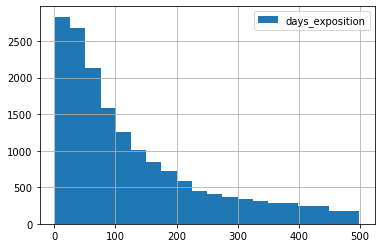

In [17]:
data['days_exposition'][data['days_exposition'] >= 0].hist(bins=20, legend=True)

### Вывод: на основе полученных данных можно сделать вывод, что быстрая продажа - за 40 дней (первый квартиль), в среднем квартиры продаются за 130 дней, половина квартир продается не более чем за 89 дней, медленная продажа соответствует 187+ дням (третий квартиль)

### Изучим гистограммы для ключевых параметров.

<AxesSubplot:ylabel='Frequency'>

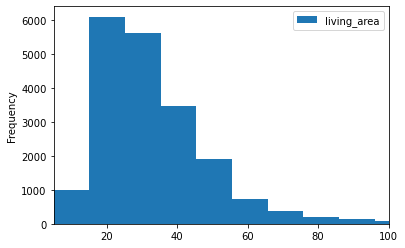

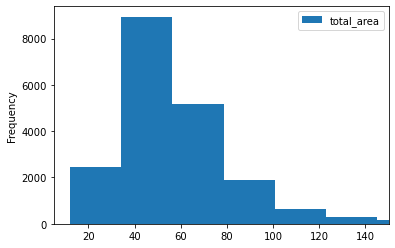

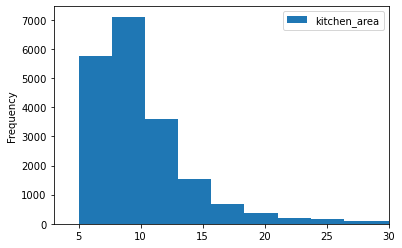

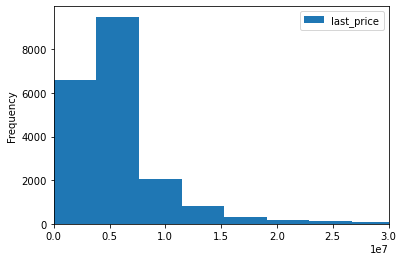

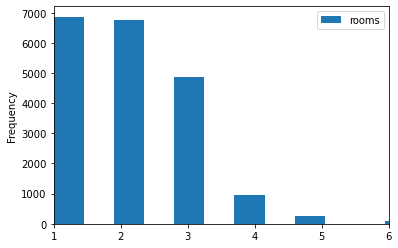

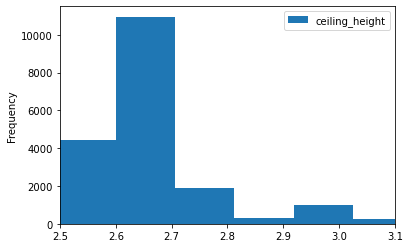

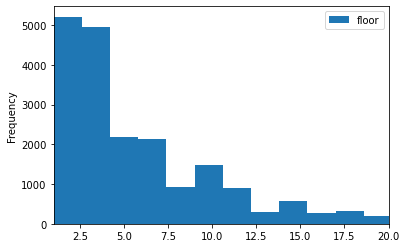

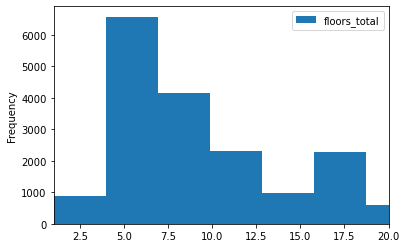

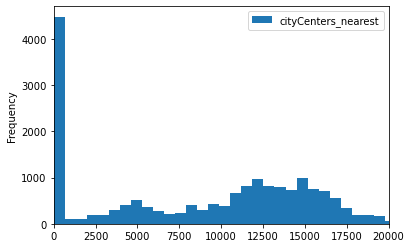

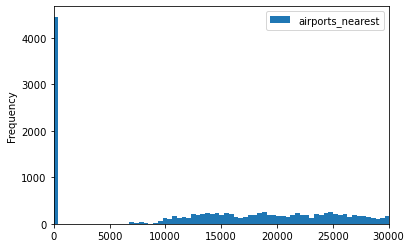

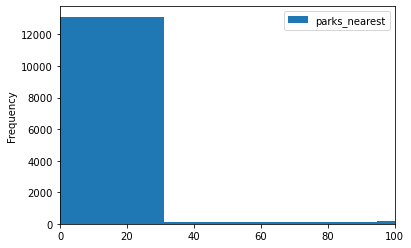

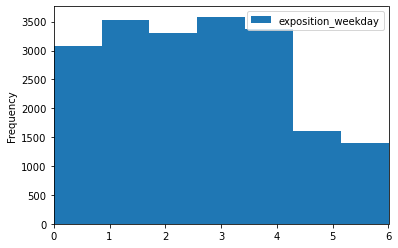

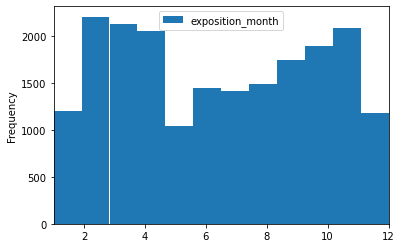

In [52]:
#data[['living_area', 'total_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor', 'floor_type', 'floors_total', 'cityCenters_nearest', 'airports_nearest', 'parks_nearest', 'exposition_weekday', 'exposition_month']].hist(bins=10, figsize=(15, 20))
data.plot(y='living_area', kind='hist', bins=40, xlim=(5, 100))
data.plot(y='total_area', kind='hist', bins=40, xlim=(5, 150))
data.plot(y='kitchen_area', kind='hist', bins=40, xlim=(3, 30))

data.plot(y='last_price', kind='hist', bins=200, xlim=(0, 30000000))
data.plot(y='rooms', kind='hist', bins=40, xlim=(1, 6))
data.plot(y='ceiling_height', kind='hist', bins=40, xlim=(2.5, 3.1))

data.plot(y='floor', kind='hist', bins=20, xlim=(1, 20))
data.plot(y='floors_total', kind='hist', bins=20, xlim=(1, 20))
data.plot(y='cityCenters_nearest', kind='hist', bins=100, xlim=(0, 20000))

data.plot(y='airports_nearest', kind='hist', bins=200, xlim=(0, 30000))
data.plot(y='parks_nearest', kind='hist', bins=100, xlim=(0, 100))
data.plot(y='exposition_weekday', kind='hist', bins=7, xlim=(0, 6))
data.plot(y='exposition_month', kind='hist', bins=12, xlim=(1, 12))

### Вывод: большая часть квартир имеет жилую площадь от 15 до 50 м, общую площадь от 15 до 100 м, площадь кухни от 5 до 15 м, цена в большинстве случаев не превышает 10000 руб, комнат в квартире обычно от 1 до 3, высота потолка - около 2,7 м, количество этажей редко превышает 17,  многие продаваемые квартиры находятся в центре или в зоне аэропорта, информация о парках указана, когда парки находятся поблизости, на выходных объявления выкладывают вдвое реже, чем в будние дни, решение о продаже квартиры слабо зависит от месяца.  

### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

In [69]:
ad_price_data = data.pivot_table(index='locality_name', values='price_per_metre', aggfunc=['count', 'mean'])
ad_price_data.columns = ['ad_number', 'mean_price_per_metre']

ad_price_data = ad_price_data.sort_values(by='ad_number', ascending=False).head(10)
ad_price_data.sort_values(by='mean_price_per_metre', ascending=False)

,ad_number,mean_price_per_metre
locality_name,,
Санкт-Петербург,13301,227013.815607
Пушкин,315,208856.889336
поселок Парголово,283,204144.398912
деревня Кудрово,217,191568.682560
поселок Мурино,434,178260.643994
поселок Шушары,378,159957.772272
Всеволожск,335,134302.991598
Колпино,313,131926.681632
Гатчина,264,122098.937971


### Вывод: По представленным данным видно, что самая большая стоимость (средняя) квадратного метра в СПб (она составляет 227 тыс.руб.). Самая маленькая из представленных - в Выборге (почти 99 тыс. руб).

### Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра

In [91]:
km_price = data[data['locality_name'] == 'Санкт-Петербург'].pivot_table(index='city_center_km', values='price_per_metre', aggfunc='median')
km_price_mean = (km_price.loc[0, 'price_per_metre'] - km_price.loc[km_price['price_per_metre'].count()-1, 'price_per_metre']) / km_price['price_per_metre'].count()
print('Средняя стоимость 1 км составляет',km_price_mean)
km_price

Средняя стоимость 1 км составляет 2632.3520770903106


,price_per_metre
city_center_km,
0,229508.196721
1,206411.994011
2,191213.779381
3,184954.751131
4,210800.744879
5,214769.370598
6,230769.230769
7,223088.235294
8,194824.399261


<AxesSubplot:title={'center':'Зависимость цены кв.м. от расстояния до центра'}, xlabel='city_center_km'>

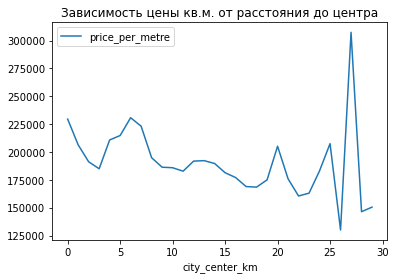

In [94]:
km_price.plot(title='Зависимость цены кв.м. от расстояния до центра')

### Вывод: Зависимость цены кв.м. от расстояния до центра отсутствует

### Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от  общей площади;жилой площади; площади кухни; количество комнат; типа этажа, на котором расположена квартира (первый, последний, другой); даты размещения (день недели, месяц, год);

<AxesSubplot:xlabel='exposition_year'>

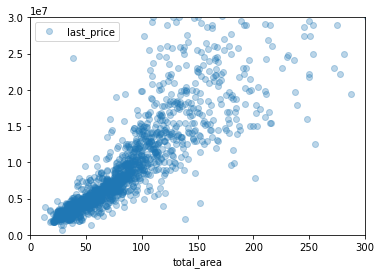

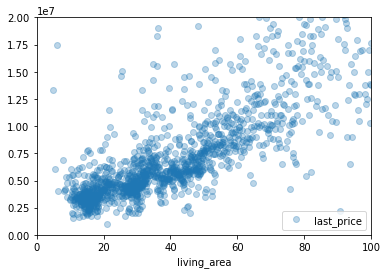

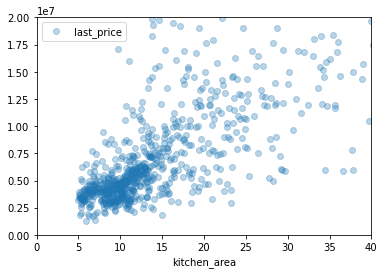

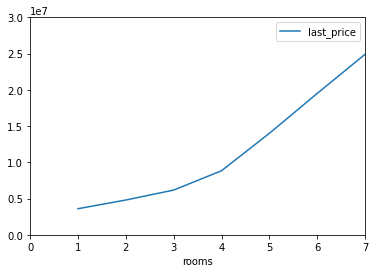

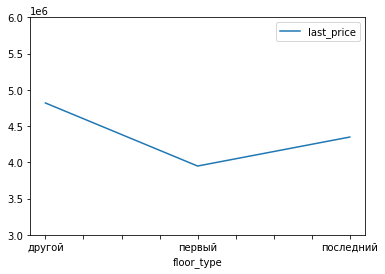

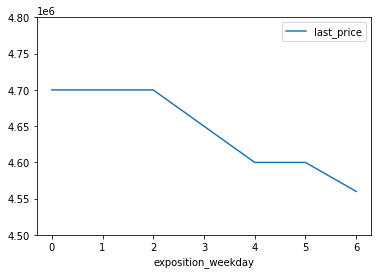

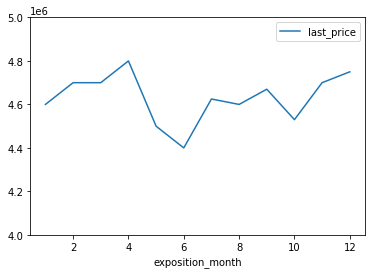

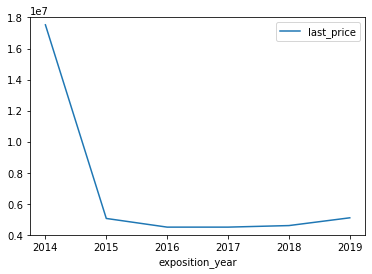

In [145]:
data.pivot_table(index='total_area', values='last_price', aggfunc='median').plot(style='o', alpha=0.3, xlim=(0, 300), ylim=(0, 30000000))
data.pivot_table(index='living_area', values='last_price', aggfunc='median').plot(style='o', alpha=0.3, xlim=(0, 100), ylim=(0, 20000000))
data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median').plot(style='o', alpha=0.3, xlim=(0, 40), ylim=(0, 20000000))

data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(xlim=(0, 7), ylim=(0, 30000000))
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(ylim=(3000000, 6000000))

data.pivot_table(index='exposition_weekday', values='last_price', aggfunc='median').plot(ylim=(4500000, 4800000))
data.pivot_table(index='exposition_month', values='last_price', aggfunc='median').plot(ylim=(4000000, 5000000))
data.pivot_table(index='exposition_year', values='last_price', aggfunc='median').plot(ylim=(4000000, 18000000))

### Вывод: по графикам видно, что с увеличением площади или количества комнат цена растет быстрее, чем линейно. Также можно заметить, что наиболее предпочтитеьными (а значит, дорогими) являются квартиры на не первом и не последнем этажах. К концу недели наблюдается явный тренд к снижению стоимости жил. площади, притом зависимость от месяца выражена слабо. На последнем графике видно, что рынок недвижимости просел после кризиса 2014.

# Общий вывод
Исходя из проделанной работы можно сделать вывод, что рынок недвижимости в указанный период оставался довольно активным (больше половины объявлений о продаже снимались в точение 1 квартала). Стало понятно, что размер квартиры приводит к нелинейному росту цена. Это объясняется тем, что большие квартиры относятся к элитной недвижимости, а значит, там учтена наценка за "роскошь". Также было замечено, что ранок просел в 2014 и не отыграл своих прежних позиций. Самая высокая стоимость недвижимости (свыше 200 тыс. за кв.м.) была установлена в СПб, Пушкине, Парголово. В спб цена квартиры слабо зависит от расстояния до центра, это связано с наличием элитных районов, удаленных от центра.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод